In [165]:
import pandas as pd
import numpy as np

from scipy import stats
import scipy.stats as sts
from scipy.stats import pearsonr

import seaborn as sns
import matplotlib.pyplot as plt

#улучшим качество изображений
%config InlineBackend.figure_format = 'retina'

In [186]:
df = pd.read_csv('df_result.csv')

In [187]:
df

,id,number of rooms,price(rub),metro,time(min),total area(м²),year of completion,living area(м²),kitchen area(м²),ceiling height(м),type of house,WC,apartment floor,total floors,readiness,num of elevators,type of elevators
0,283969757,1,16042265,Савёловская,13,32.20,2025,36.2,18.1,3.0,Монолитный,1,4,22,Без отделки,1,пассажирский
1,284037342,1,16297308,Технопарк,17,43.50,2024,36.2,18.1,3.1,Монолитно-кирпичный,1,2,17,Без отделки,1,пассажирский
2,266826884,1,17086799,Дмитровская,8,32.10,2025,11.2,13.4,3.0,Монолитный,1,11,36,Чистовая,3,пассажирский
3,284807290,1,18669730,Преображенская площадь,5,46.59,2024,36.2,18.1,3.1,Монолитно-кирпичный,1,2,17,Без отделки,1,пассажирский
4,264958724,1,19015154,Марьина роща,8,43.45,2024,36.2,18.1,3.0,Монолитный,1,38,55,Предчистовая,4,пассажирский
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,284759598,2,10000000,Солнцево,10,54.20,2023,28.2,16.2,3.1,Монолитный,1,7,24,Без отделки,1,пассажирский
1481,284593318,2,11000000,Ольховая,20,52.50,2022,25.4,11.7,2.7,Монолитный,1,7,15,Чистовая,1,пассажирский
1482,283555890,1,7591477,Саларьево,19,32.17,2024,10.8,9.7,2.8,Монолитный,1,4,18,Без отделки,1,пассажирский
1483,284961268,1,9220000,Ольховая,9,40.50,2022,18.9,18.1,2.8,Панельный,1,8,14,Чистовая,1,пассажирский


Так как столбцы с площадью кухни и жилой площадь имели пропуски, мы не могли корректно заполнить их таким образом, чтобы не нарушить корреляцию(их сумма в точности должна ровняться общей площади квартиры). А так как наши действия и шаги в этом проекте не затрагивают столбец 'жидая площадь', то давайте удалим его

In [188]:
df.drop(columns = ['living area(м²)'],axis = 1, inplace=True)

### Создание новых признаков

**1. Для начала сделаем столбец со стоимостью одного квадратного метра:**

In [189]:
df['ppm(rub)'] = (df['price(rub)']//df['total area(м²)']).astype(int)

In [190]:
df

,id,number of rooms,price(rub),metro,time(min),total area(м²),year of completion,kitchen area(м²),ceiling height(м),type of house,WC,apartment floor,total floors,readiness,num of elevators,type of elevators,ppm(rub)
0,283969757,1,16042265,Савёловская,13,32.20,2025,18.1,3.0,Монолитный,1,4,22,Без отделки,1,пассажирский,498206
1,284037342,1,16297308,Технопарк,17,43.50,2024,18.1,3.1,Монолитно-кирпичный,1,2,17,Без отделки,1,пассажирский,374650
2,266826884,1,17086799,Дмитровская,8,32.10,2025,13.4,3.0,Монолитный,1,11,36,Чистовая,3,пассажирский,532299
3,284807290,1,18669730,Преображенская площадь,5,46.59,2024,18.1,3.1,Монолитно-кирпичный,1,2,17,Без отделки,1,пассажирский,400723
4,264958724,1,19015154,Марьина роща,8,43.45,2024,18.1,3.0,Монолитный,1,38,55,Предчистовая,4,пассажирский,437633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,284759598,2,10000000,Солнцево,10,54.20,2023,16.2,3.1,Монолитный,1,7,24,Без отделки,1,пассажирский,184501
1481,284593318,2,11000000,Ольховая,20,52.50,2022,11.7,2.7,Монолитный,1,7,15,Чистовая,1,пассажирский,209523
1482,283555890,1,7591477,Саларьево,19,32.17,2024,9.7,2.8,Монолитный,1,4,18,Без отделки,1,пассажирский,235980
1483,284961268,1,9220000,Ольховая,9,40.50,2022,18.1,2.8,Панельный,1,8,14,Чистовая,1,пассажирский,227654


In [191]:
list(df['metro'].unique())

['Савёловская',
 'Технопарк',
 'Дмитровская',
 'Преображенская площадь',
 'Марьина роща',
 'Спартак',
 'Тушинская',
 'Фили',
 'Терехово',
 'Белорусская',
 'Серпуховская',
 'Ботанический сад',
 'Ленинский проспект',
 'Деловой центр',
 'Павелецкая',
 'Воробьёвы горы',
 'Улица 1905 года',
 'Арбатская',
 'Площадь Революции',
 'Октябрьская',
 'Третьяковская',
 'Новокузнецкая',
 'Красный Балтиец',
 'Лужники',
 'Парк Победы',
 'Полянка',
 'Алексеевская',
 'Шелепиха',
 'Мичуринский проспект',
 'Чистые пруды',
 'ЗИЛ',
 'Смоленская',
 'Выставочная',
 'Киевская',
 'Тульская',
 'Печатники',
 'Беговая',
 'Кузнецкий мост',
 'Кожуховская',
 'Аминьевская',
 'Нагорная',
 'Коптево',
 'Рижская',
 'Петровский Парк',
 'Курская',
 'Прокшино',
 'Бунинская аллея',
 'Гражданская',
 'Динамо',
 'Бутырская',
 'Академическая',
 'Народное Ополчение',
 'Красные ворота',
 'Калужская',
 'Крымская',
 'Ростокино',
 'Кутузовская',
 'Давыдково',
 'Спортивная',
 'Аэропорт',
 'Сретенский бульвар',
 'Коломенская',
 'Электроз

#### 2. Создадим столбец с разбиением квартир по округам

Перед началом создания столбца с округом,где находится квартира, мы посмотрели, какие станции есть в нашем датафрейме(предыдущий шаг), и изучая сайт https://domokucha.info/moscow_metro_district.html расписали к какому округу какие станции принадлежат. Ну и теперь можем создать словарь, где ключами будут станции метро.

In [192]:
district_ = {
    'Электрозаводская': 'Восточный административный округ',
    'Бульвар Рокоссовского': 'Восточный административный округ',
    'Черкизовская': 'Восточный административный округ',
    'Преображенская площадь': 'Восточный административный округ',
    'Сокольники': 'Восточный административный округ',
    'Лефортово': 'Восточный административный округ',
    'Крылатское': 'Западный административный округ',
    'Кунцевская': 'Западный административный округ',
    'Славянский бульвар': 'Западный административный округ',
    'Парк Победы': 'Западный административный округ',
    'Киевская': 'Западный административный округ',
    'Воробьёвы горы': 'Западный административный округ',
    'Юго-Западная': 'Западный административный округ',
    'Филёвский парк': 'Западный административный округ',
    'Багратионовская': 'Западный административный округ',
    'Фили': 'Западный административный округ',
    'Кутузовская': 'Западный административный округ',
    'Студенческая': 'Западный административный округ',
    'Раменки': 'Западный административный округ',
    'Мичуринский проспект': 'Западный административный округ',
    'Аминьевская': 'Западный административный округ',
    'Давыдково': 'Западный административный округ',
    'Озёрная': 'Западный административный округ',
    'Рабочий посёлок': 'Западный административный округ',
    'Минская': 'Западный административный округ',
    'Новаторская': 'Западный административный округ',
    'Нахабино': 'Западный административный округ',
    'Солнцево': 'Западный административный округ',
    'Савёловская': 'Северный административный округ',
    'Беломорская': 'Северный административный округ',
    'Водный стадион': 'Северный административный округ',
    'Сокол': 'Северный административный округ',
    'Аэропорт': 'Северный административный округ',
    'Динамо': 'Северный административный округ',
    'Полежаевская': 'Северный административный округ',
    'Беговая': 'Северный административный округ',
    'Окружная': 'Северный административный округ',
    'Коптево': 'Северный административный округ',
    'Стрешнево': 'Северный административный округ',
    'Панфиловская': 'Северный административный округ',
    'Зорге': 'Северный административный округ',
    'Хорошёво': 'Северный административный округ',
    'Петровский Парк': 'Северный административный округ',
    'ЦСКА': 'Северный административный округ',
    'Красный Балтиец': 'Северный административный округ',
    'Гражданская': 'Северный административный округ',
    'Селигерская': 'Северный административный округ',
    'Яхромская': 'Северный административный округ',
    'Верхние Лихоборы': 'Северный административный округ',
    'Марк': 'Северный административный округ',
    'Дегунино': 'Северный административный округ',
    'Планерная': 'Северо-Западный административный округ',
    'Сходненская': 'Северо-Западный административный округ',
    'Тушинская': 'Северо-Западный административный округ',
    'Октябрьское поле': 'Северо-Западный административный округ',
    'Спартак': 'Северо-Западный административный округ',
    'Терехово': 'Северо-Западный административный округ',
    'Народное Ополчение': 'Северо-Западный административный округ',
    'Карамышевская': 'Северо-Западный административный округ',
    'Пятницкое шоссе': 'Северо-Западный административный округ',
    'Трикотажная': 'Северо-Западный административный округ',
    'Волоколамская': 'Северо-Западный административный округ',
    'Митино': 'Северо-Западный административный округ',
    'Водники': 'Северо-Западный административный округ',
    'Медведково': 'Северо-Восточный административный округ',
    'Бабушкинская': 'Северо-Восточный административный округ',
    'Свиблово': 'Северо-Восточный административный округ',
    'Ботанический сад': 'Северо-Восточный административный округ',
    'Алексеевская': 'Северо-Восточный административный округ',
    'Отрадное': 'Северо-Восточный административный округ',
    'Владыкино': 'Северо-Восточный административный округ',
    'Дмитровская': 'Северо-Восточный административный округ',
    'Улица Сергея Эйзенштейна': 'Северо-Восточный административный округ',
    'Телецентр': 'Северо-Восточный административный округ',
    'Ростокино': 'Северо-Восточный административный округ',
    'Марьина роща': 'Северо-Восточный административный округ',
    'Бутырская': 'Северо-Восточный административный округ',
    'Бибирево': 'Северо-Восточный административный округ',
    'Смоленская': 'Центральный административный округ',
    'Арбатская': 'Центральный административный округ',
    'Площадь Революции': 'Центральный административный округ',
    'Курская': 'Центральный административный округ',
    'Белорусская': 'Центральный административный округ',
    'Маяковская': 'Центральный административный округ',
    'Театральная': 'Центральный административный округ',
    'Новокузнецкая': 'Центральный административный округ',
    'Павелецкая': 'Центральный административный округ',
    'Третьяковская': 'Центральный административный округ',
    'Площадь Ильича': 'Центральный административный округ',
    'Рижская': 'Центральный административный округ',
    'Китай-город': 'Центральный административный округ',
    'Октябрьская': 'Центральный административный округ',
    'Парк Культуры': 'Центральный административный округ',
    'Краснопресненская': 'Центральный административный округ',
    'Полянка': 'Центральный административный округ',
    'Серпуховская': 'Центральный административный округ',
    'Красные ворота': 'Центральный административный округ',
    'Чистые пруды': 'Центральный административный округ',
    'Охотный ряд': 'Центральный административный округ',
    'Кропоткинская': 'Центральный административный округ',
    'Фрунзенская': 'Центральный административный округ',
    'Спортивная': 'Центральный административный округ',
    'Улица 1905 года': 'Центральный административный округ',
    'Кузнецкий мост': 'Центральный административный округ',
    'Шелепиха': 'Центральный административный округ',
    'Деловой центр': 'Центральный административный округ',
    'Лужники': 'Центральный административный округ',
    'Шелепиха': 'Центральный административный округ',
    'Лужники': 'Центральный административный округ',
    'Выставочная': 'Центральный административный округ',
    'Сретенский бульвар': 'Центральный административный округ',
    'Достоевская': 'Центральный административный округ',
    'Римская': 'Центральный административный округ',
    'Авиамоторная': 'Юго-Восточный административный округ',
    'Кожуховская': 'Юго-Восточный административный округ',
    'Печатники': 'Юго-Восточный административный округ',
    'Братиславская': 'Юго-Восточный административный округ',
    'Волгоградский проспект': 'Юго-Восточный административный округ',
    'Текстильщики': 'Юго-Восточный административный округ',
    'Угрешская': 'Юго-Восточный административный округ',
    'Новохохловская': 'Юго-Восточный административный округ',
    'Нижегородская': 'Юго-Восточный административный округ',
    'Калитники': 'Юго-Восточный административный округ',
    'Некрасовка': 'Юго-Восточный административный округ',
    'Депо': 'Юго-Восточный административный округ',
    'Окская': 'Юго-Восточный административный округ',
    'Перерва': 'Юго-Восточный административный округ',
    'Академическая': 'Юго-Западный административный округ',
    'Калужская': 'Юго-Западный административный округ',
    'Ленинский проспект': 'Юго-Западный административный округ',
    'Профсоюзная': 'Юго-Западный административный округ',
    'Крымская': 'Юго-Западный административный округ',
    'Бунинская аллея': 'Юго-Западный административный округ',
    'Воронцовская': 'Юго-Западный административный округ',
    'Улица Горчакова': 'Юго-Западный административный округ',
    'Тёплый Стан': 'Юго-Западный административный округ',
    'Ломоносовский проспект': 'Юго-Западный административный округ',
    'Бульвар Адмирала Ушакова': 'Юго-Западный административный округ',
    'Улица Скобелевская': 'Юго-Западный административный округ',
    'Автозаводская': 'Южный административный округ',
    'Технопарк': 'Южный административный округ',
    'Коломенская': 'Южный административный округ',
    'Кантемировская': 'Южный административный округ',
    'Шаболовская': 'Южный административный округ',
    'Тульская': 'Южный административный округ',
    'Нагатинская': 'Южный административный округ',
    'Нагорная': 'Южный административный округ',
    'Аннино': 'Южный административный округ',
    'Верхние котлы': 'Южный административный округ',
    'ЗИЛ': 'Южный административный округ',
    'Красный Строитель': 'Южный административный округ',
    'Лесопарковая': 'Южный административный округ',
    'Москворечье': 'Южный административный округ',
    'Румянцево': 'Новомосковский административный округ',
    'Саларьево': 'Новомосковский административный округ',
    'Филатов Луг': 'Новомосковский административный округ',
    'Прокшино': 'Новомосковский административный округ',
    'Ольховая': 'Новомосковский административный округ',
    'Коммунарка': 'Новомосковский административный округ',
    'Рассказовка': 'Новомосковский административный округ',
    'Говорово': 'Новомосковский административный округ',
    'Щербинка': 'Новомосковский административный округ', 
    'Хлебниково': 'Зеленоградский административный округ'} 

In [193]:
df['Okrug'] = df['metro'].map(district_)

In [194]:
df

,id,number of rooms,price(rub),metro,time(min),total area(м²),year of completion,kitchen area(м²),ceiling height(м),type of house,WC,apartment floor,total floors,readiness,num of elevators,type of elevators,ppm(rub),Okrug
0,283969757,1,16042265,Савёловская,13,32.20,2025,18.1,3.0,Монолитный,1,4,22,Без отделки,1,пассажирский,498206,Северный административный округ
1,284037342,1,16297308,Технопарк,17,43.50,2024,18.1,3.1,Монолитно-кирпичный,1,2,17,Без отделки,1,пассажирский,374650,Южный административный округ
2,266826884,1,17086799,Дмитровская,8,32.10,2025,13.4,3.0,Монолитный,1,11,36,Чистовая,3,пассажирский,532299,Северо-Восточный административный округ
3,284807290,1,18669730,Преображенская площадь,5,46.59,2024,18.1,3.1,Монолитно-кирпичный,1,2,17,Без отделки,1,пассажирский,400723,Восточный административный округ
4,264958724,1,19015154,Марьина роща,8,43.45,2024,18.1,3.0,Монолитный,1,38,55,Предчистовая,4,пассажирский,437633,Северо-Восточный административный округ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,284759598,2,10000000,Солнцево,10,54.20,2023,16.2,3.1,Монолитный,1,7,24,Без отделки,1,пассажирский,184501,Западный административный округ
1481,284593318,2,11000000,Ольховая,20,52.50,2022,11.7,2.7,Монолитный,1,7,15,Чистовая,1,пассажирский,209523,Новомосковский административный округ
1482,283555890,1,7591477,Саларьево,19,32.17,2024,9.7,2.8,Монолитный,1,4,18,Без отделки,1,пассажирский,235980,Новомосковский административный округ
1483,284961268,1,9220000,Ольховая,9,40.50,2022,18.1,2.8,Панельный,1,8,14,Чистовая,1,пассажирский,227654,Новомосковский административный округ


In [195]:
df.to_csv('df_result.csv', index=False)

## Гипотезы

Давайте проверим гипотезу о том, что 
###  ` №1. В центральном административном округе квартиры дороже, чем в остальных округах .`
#### H0: Цена за квартиру в  ЦАО выше, чем средняя по рынку
#### H1: Цена за квартиру в  ЦАО ниже, чем средняя по рынку

Для этого воспользуемся Т-тестом

In [196]:
alpha = 0.5

In [197]:
cent_pr = df[df['Okrug'] == 'Центральный административный округ']['price(rub)']

t_stat, p_value = sts.ttest_1samp(cent_pr, df['price(rub)'].mean() , alternative= 'less')

print("Statistic:", t_statistic)
print("p-value:", p_value)
if p_value < alpha:
    print('H0 отвергается')
else:
    print('H0 принимается')

Statistic: 0.3090520770288338
p-value: 1.0
H0 принимается


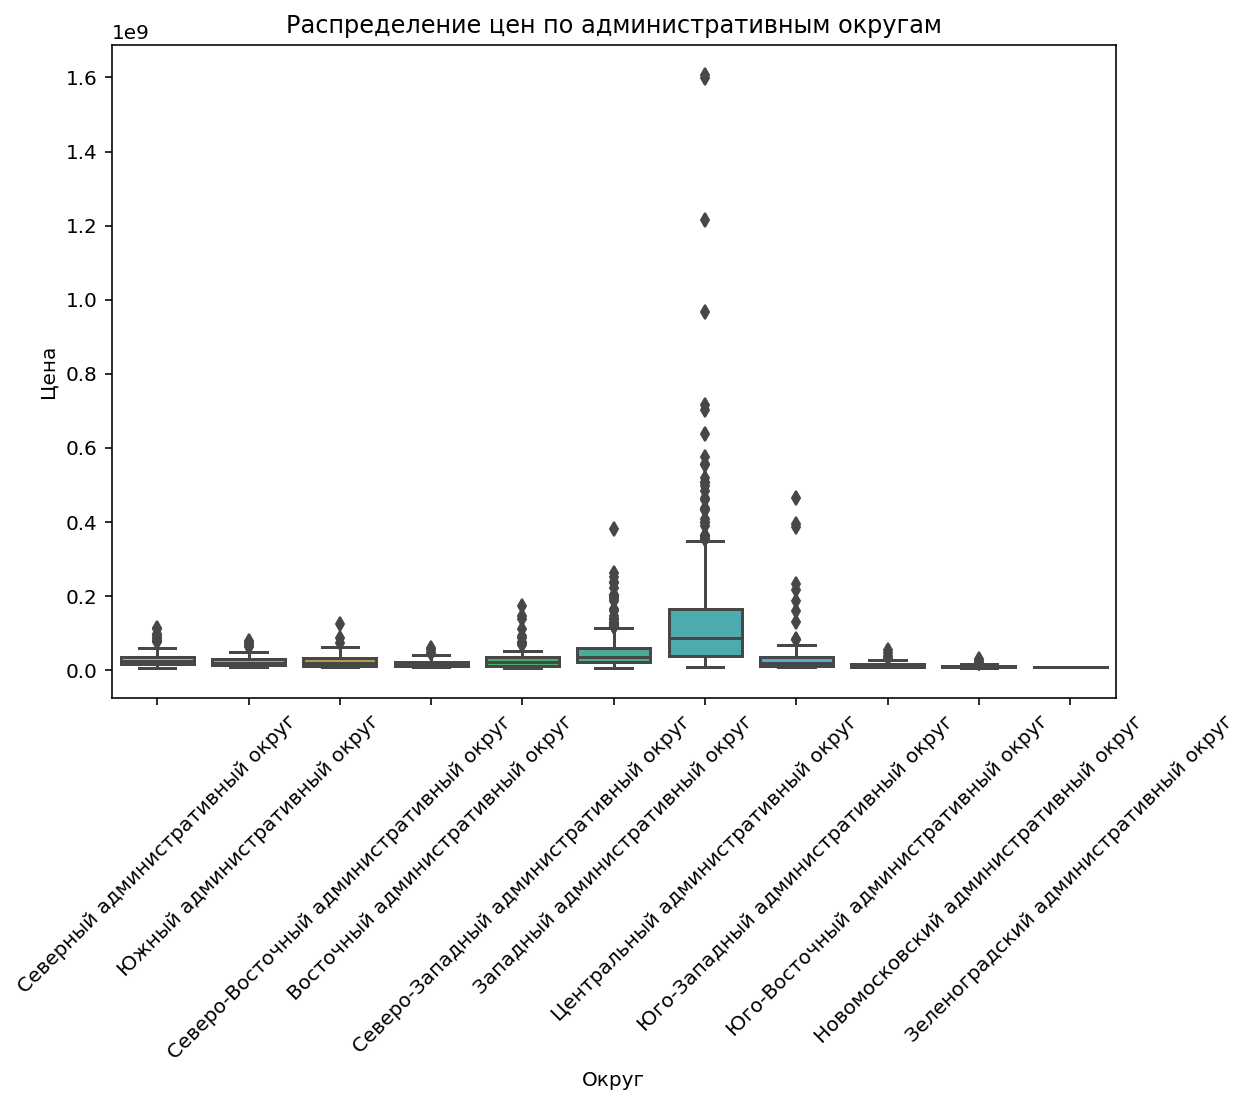

In [198]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x='Okrug', y='price(rub)')
plt.xticks(rotation=45)
plt.title('Распределение цен по административным округам')
plt.xlabel('Округ')
plt.ylabel('Цена')
plt.show()

Таким образом, квартиры в Центральном административном округе дороже, чем в остальных округах. Это легко объяснятеся тем, что в центральном административном округе многие строения являются архитекртурным наследием страны, здания регулярно реконструируются плюс имеют удобное расположение, с развитой инфраструктурой, что очевидно и делает недвижимость в этом административном округе значительно дороже. 


###  `№2. В диапозоне [ 1; 30] этажах квартиры стоят дороже, чем на остальных.`
#### H0: Цена у квартир, расположенных ниже 30 этажа выше, чем средняя цена по рынку 
#### H1: Цена у квартир, расположенных ниже 30 этажа ниже, чем средняя цена по рынку 

In [199]:
low = df[df['apartment floor'] <= 30]['price(rub)']


t_stat, p_value = sts.ttest_1samp(low, df['price(rub)'].mean() , alternative= 'less')

print("Statistic:", t_statistic)
print("p-value:", p_value)
if p_value < alpha:
    print('H0 отвергается')
else:
    print('H0 принимается')

Statistic: 0.3090520770288338
p-value: 0.5311084391954458
H0 принимается


Таким образом, действительно, квартиры, расположенные на 30 этаже и ниже стоят дороже, нежели остальные. 

Объясняется это тем, что, во-первых, в выборку вошли квартиры, расположенные в исторических районах и которые не предусматривают высокую этажность дома, а как было выявлено раннее, в ЦАО квартиры стоят дороже. 

Во-вторых, основная масса домов стоит 2022-2025 года сдачи, а сейчас застройщики возводят дома 16+ этажностью, что позволяет разместить большее количество людей(выгодно застройщику), ну и конечно, новые жилые комплексы многофункциональны, включают в себя развитую инфраструктуры(магазины, садики, школы поблизости), что предоставляется отличной возможностью молодым семьям преобрести видовое жилье с комфортными условиями для жизни. 

**Почему мы взяли именно такой диапазон?** Объясняется это тем, что на высоких этажах есть свои **недостатки**, например: заболевания людей, которые не позволяют им жить в высотках: акрофобия, сердечно-сосудистые заболевания, гипертония и тд. Также, не везде ловит стабильная сотовая связь и не повсеместно доступно естественное проветривание(из-за мер безопасности, окна невозможно открыть), наличие только искусственного проветривания комнаты в виде вентеляции.

### №3. Влияет ли этажность дома на количество лифтов в нем

#### H0: Между этажностью дома и числом лифтов в нем нет корреляции
#### H1: Между этажностью дома и числом лифтов в нем есть корреляция

Проверим это с помощью расчета коэффициента корреляции Пирсона

In [200]:
correlation, p_value = pearsonr(df['total floors'], df['num of elevators'])
print("Коэффициент корреляции:", correlation)
print("p-значение:", p_value)
if p_value < alpha:
    print('H0 отвергается')
else:
    print('H0 принимается')

Коэффициент корреляции: 0.6495009099092284
p-значение: 1.1365066723908693e-178
H0 отвергается


Так как нулевая гипотеза формулируется, как "между числом этажей в доме и количеством лифтов нет корреляции", то исходя из полученного результата мы делаем вывод о том, что есть положительная линейная взаимосвязь(значение коэффициента 0.65). В целом, достаточно очевидная взаимосвязь, так как при высокой этажности дома требуется соответствующее количество лифтов на случай, если случится неожиданная поломка, чтобы не доставлять жильцам лишних неудобств.

Говоря о **неочевидных взаимосвязях**, напрашивается идея о том, 
###  `№4. Влияет ли год постройки дома на время до близжайшего метро.`
#### H0: Между годом постройки дома и временем до близжайшего метро нет корреляции
#### H1: Между годом постройки дома и временем до близжайшего метро есть корреляция
Ведь дома более старого года сдачи не предусматривали расширение метрополитена, и не опирались на факт наличия станций рядом с домом. А в наши дни для покупателей это очень весомый факт при покупки квартиры, на что и опираются застройщики для своих будущих проектов.

In [201]:
correlation, p_value = pearsonr(df['year of completion']-2023, df['time(min)'])
print("Коэффициент корреляции:", correlation)
print("p-значение:", p_value)
if p_value < alpha:
    print('H0 отвергается')
else:
    print('H0 принимается')

Коэффициент корреляции: 0.06471783555509619
p-значение: 0.012614817994813324
H0 отвергается


Так как в контексте использования коэффициента корреляции Пирсона нулевая гипотеза формулируется, как "между годом постройки дома и временем до близжайшего метро нет корреляции", то исходя из полученного результата мы делаем вывод о том, что положительная линейная взаимосвязь есть, но она очень слабая (значение коэффициента 0.06)

Разберемся поподробнее

In [202]:
df.corr()

,id,number of rooms,price(rub),time(min),total area(м²),year of completion,kitchen area(м²),ceiling height(м),WC,apartment floor,total floors,num of elevators,ppm(rub)
id,1.000000,-0.035002,-0.033847,-0.006864,-0.059071,0.166774,-0.059714,0.009837,-0.068697,-0.002772,-0.025133,-0.069061,-0.012785
number of rooms,-0.035002,1.000000,0.415303,-0.049305,0.708839,-0.162692,0.191661,0.189083,0.701089,0.080749,-0.031115,-0.053758,0.304530
price(rub),-0.033847,0.415303,1.000000,-0.135325,0.807231,-0.141455,0.349976,0.310711,0.577219,-0.078799,-0.242614,-0.163073,0.817633
time(min),-0.006864,-0.049305,-0.135325,1.000000,-0.126203,0.064718,-0.102481,-0.034146,-0.113370,0.028424,0.007880,-0.007159,-0.146944
total area(м²),-0.059071,0.708839,0.807231,-0.126203,1.000000,-0.322946,0.386256,0.226524,0.786971,0.022673,-0.152069,-0.139232,0.574813
year of completion,0.166774,-0.162692,-0.141455,0.064718,-0.322946,1.000000,-0.041823,-0.080433,-0.263883,-0.107228,-0.018539,0.023716,-0.110125
kitchen area(м²),-0.059714,0.191661,0.349976,-0.102481,0.386256,-0.041823,1.000000,0.040883,0.334792,-0.044697,-0.125573,-0.048955,0.317273
ceiling height(м),0.009837,0.189083,0.310711,-0.034146,0.226524,-0.080433,0.040883,1.000000,0.177451,-0.059497,-0.126158,-0.161985,0.470081
WC,-0.068697,0.701089,0.577219,-0.113370,0.786971,-0.263883,0.334792,0.177451,1.000000,-0.002277,-0.134975,-0.085356,0.472531
apartment floor,-0.002772,0.080749,-0.078799,0.028424,0.022673,-0.107228,-0.044697,-0.059497,-0.002277,1.000000,0.643618,0.417014,-0.123191


Можно заметить, что наблюдается высокая корреляция(почти прямая связь) между количеством комнат и площадью квартир; между числом комнат и количеством туалетов. 

Поэтому при построении множественной модели линейно регрессии характеристики "WC" и "number of rooms" мы не будем включать

## Выдвенем гипотезы о значимости следующих коэффициенов линейной регрессии: 

### `№5. Коэффициент при регрессоре, определяющем год постройки, незначим в формировании стоимости квартиры.`

### `№6. Коэффициент при регрессоре общего метража квартиры незначим в формировании стоимости квартиры.`

Построим множественную модель линейной регрессии

In [203]:
X = df[['time(min)', 'total area(м²)', 'year of completion', 'kitchen area(м²)', 'ceiling height(м)', 'apartment floor', 'num of elevators', 'total floors']]  
y = df['price(rub)'] 

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             price(rub)   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     428.3
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:13:40   Log-Likelihood:                -28663.
No. Observations:                1485   AIC:                         5.734e+04
Df Residuals:                    1476   BIC:                         5.739e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.368e+10   1.68

/Users/natala/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Вывод: 
**(№5)** Гипотеза о незначимости коэффициента при показателе года постройки дома отвергается, коэффициент значим при любом уровне значимости(p-value<alpha). Направление влияния положительное. То есть стоимость квартиры, находящейся в доме, построенном на год позже, увеличивается на величину оцененного коэффициента при регрессоре года постройки (6.698e+06). Следовательно, наше предположение о скрытой взаимосвязи было верным.

**(№6)** Гипотеза о незначимости коэффициента при показателе метража отвергается, коэффициент значим при любом уровне значимости(p-value<alpha). Направление влияния положительное. То есть каждый добавленный квадратный метр площади приводит к увеличению стоимости квартиры на величину оцененного коэффициента (1.539e+06). 

Говоря о выявлении **неочевидных взаимосвязей** можно отметить:

**1)** Влияние этажности дома на формирование цены на квартиру: при ее увеличение стоимость будет уменьшаться. Казалось бы, высокая этажность должна быть более привлекательным фактором для покупателей, так как это во-первых, красивый вид, а во-вторых, дома более модернизированы. Однако, как было выявлено раннее, это не всегда перекрывает минусы жилья в таких зданиях.
Возможно, это связано с тем, что высокоэтажные дома потребляют больше энергии для отопления, охлаждения, обслуживания лифтов и тд. Как следствие из этого -  более высокие платежи для жильцов, что может негативно сказываться на привлекательности домов на рынке и их стоимости соответственно.

**2)** Влияние высоты потолков на формирование цены на квартиру: при ее увеличение стоимость будет увеличиваться. Можем объяснить это тем, что  квартиры с высоким потолком обычно дают ощущение простора и позволяют грамотно организовать воздушную среду, улучшить естественное освещение.  

Для более точной оценки влияния регрессоров на ценообразования жилья (в терминах элластичности и процентного приращения при изменении независимых переменных) построим дополнительную регрессионную модель логарифма стоимости квартиры на те же переменные. 

In [204]:
df['ln(price)'] = np.log(df['price(rub)'])

In [205]:
X = df[['time(min)', 'total area(м²)', 'year of completion', 'kitchen area(м²)', 'ceiling height(м)', 'apartment floor', 'num of elevators', 'total floors']]  
y = df['ln(price)'] 

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              ln(price)   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     539.8
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:13:40   Log-Likelihood:                -1108.2
No. Observations:                1485   AIC:                             2234.
Df Residuals:                    1476   BIC:                             2282.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 45.6930     14

/Users/natala/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Результаты не меняются: по-прежнему значимы коэффициенты при регрессорах, определяющих площадь квартиры и год постройки дома на 5% уровне значимости. 

Однако теперь при увеличении площади на дополнительный кв метр стоимость вырастет на 1,3%; 
При рассмотрении квартиры, находящейся в доме, построенном на год позже, стоимость жилья сокращается на 1,5% 